# PRÀCTICA IAA - ABRIL RISSO

In [193]:
%pip install scikit-learn --upgrade --quiet
%pip install -U imbalanced-learn
%pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [194]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [195]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from statsmodels.genmod.generalized_linear_model import GLM
from pandas.plotting import scatter_matrix
from scipy.stats import boxcox

In [196]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
cirrhosis_patient_survival_prediction = fetch_ucirepo(id=878) 
   
# variable information 
cirrhosis_patient_survival_prediction.variables

,name,role,type,demographic,description,units,missing_values
0,ID,ID,Integer,None,unique identifier,None,no
1,N_Days,Other,Integer,None,number of days between registration and the ea...,None,no
2,Status,Target,Categorical,None,"status of the patient C (censored), CL (censor...",None,no
3,Drug,Feature,Categorical,None,type of drug D-penicillamine or placebo,None,yes
4,Age,Feature,Integer,Age,age,days,no
5,Sex,Feature,Categorical,Sex,M (male) or F (female),None,no
6,Ascites,Feature,Categorical,None,presence of ascites N (No) or Y (Yes),None,yes
7,Hepatomegaly,Feature,Categorical,None,presence of hepatomegaly N (No) or Y (Yes),None,yes
8,Spiders,Feature,Categorical,None,presence of spiders N (No) or Y (Yes),None,yes
9,Edema,Feature,Categorical,None,presence of edema N (no edema and no diuretic ...,None,no


In [197]:
data = pd.DataFrame(cirrhosis_patient_survival_prediction.data.original)

In [198]:
data.to_csv('data_cirrhosis.csv', index=False)

## 1. ANÀLISI I PREPROCESSAT DE LES DADES

#### 1.1. LLEGIM EL CSV

In [199]:
data.columns

Index(['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites',
       'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol',
       'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets',
       'Prothrombin', 'Stage'],
      dtype='object')

In [200]:
data.shape

(418, 20)

In [201]:
data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261,2.60,156,1718.0,137.95,172,190,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302,4.14,54,7394.8,113.52,88,221,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176,3.48,210,516.0,96.10,55,151,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244,2.54,64,6121.8,60.63,92,183,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279,3.53,143,671.0,113.15,72,136,10.9,3.0


In [202]:
#no observa bé tots els missings ja que hi ha de diferents tipus
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             105
Age                0
Sex                0
Ascites          105
Hepatomegaly     105
Spiders          105
Edema              0
Bilirubin          0
Cholesterol      106
Albumin            0
Copper           106
Alk_Phos         106
SGOT             106
Tryglicerides    106
Platelets          7
Prothrombin        2
Stage              6
dtype: int64

In [203]:
#cambiar los NaNN a NaN detectado en python
data.replace('NaNN', np.nan, inplace=True)

In [204]:
data.isnull().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [205]:
def data_explore(data):
    print("DATA EXPLORATION")
    print('*'*70)
    print("Shape of dataset : ",data.shape)
    print('*'*70)
    print(data.info())
    print('*'*70)
    print("STATISTICAL ANALYSIS OF NUMERICAL DATA")
    print('*'*70)
    print(data.describe().T)
    print('*'*70)
    print("STATISTICAL ANALYSIS OF CATEGORICAL DATA")
    print('*'*70)
    print(data.describe(exclude = ['float', 'int64']).T)
    print('*'*70)
    print("MISSING VALUES")
    print('*'*70)
    print(data.isna().sum().sort_values(ascending=False))
    print('*'*70)
    print("MISSING VALUES IN %")
    print('*'*70)
    print(round(100* (data.isnull().sum() / len(data)).sort_values(ascending=False),2))
    print('*'*70)

In [206]:
data_explore(data)

DATA EXPLORATION
**********************************************************************
Shape of dataset :  (418, 20)
**********************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    object 
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    object 
 1

#### 1.2. VARIABLES NO PREPROCESSADES

In [207]:
#Canviem les variables que no es detecten com la seva categoria correcta
data['Stage'] = data['Stage'].astype('category')
data['Cholesterol'] = pd.to_numeric(data['Cholesterol'], errors='coerce')
data['Copper'] = pd.to_numeric(data['Copper'], errors='coerce')
data['Platelets'] = pd.to_numeric(data['Platelets'], errors='coerce')
data['Tryglicerides'] = pd.to_numeric(data['Tryglicerides'], errors='coerce')

In [208]:
data['Age'] = data['Age'] / 365.25

data.rename(columns={'N_Days': 'N_Years'}, inplace=True)
data['N_Years'] = data['N_Years'] / 365.25

In [209]:
data.drop(['ID'], axis=1, inplace=True)

In [210]:
data.describe()

,N_Years,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin
count,418.000000,418.000000,418.000000,284.000000,418.000000,310.000000,312.000000,312.000000,282.000000,407.000000,416.000000
mean,5.250602,50.741551,3.220813,369.510563,3.497440,97.648387,1982.655769,122.556346,124.702128,257.024570,10.731731
std,3.024430,10.447214,4.407506,231.944545,0.424972,85.613920,2140.388824,56.699525,65.148639,98.325585,1.022000
min,0.112252,26.277892,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000
25%,2.991786,42.832307,0.800000,249.500000,3.242500,41.250000,871.500000,80.600000,84.250000,188.500000,10.000000
50%,4.736482,51.000684,1.400000,309.500000,3.530000,73.000000,1259.000000,114.700000,108.000000,251.000000,10.600000
75%,7.155373,58.240931,3.400000,400.000000,3.770000,123.000000,1980.000000,151.900000,151.000000,318.000000,11.100000
max,13.127995,78.439425,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,721.000000,18.000000


#### 1.3 VARIABLES NUMÈRIQUES

In [211]:
var_num = [feature for feature in data.columns if data[feature].dtypes != 'O' and data[feature].dtypes != 'category']
print('Number of numerical variables: ', len(var_num))
print('*'*80)
print('Numerical Variables Column: ', var_num)

Number of numerical variables:  11
********************************************************************************
Numerical Variables Column:  ['N_Years', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']


Variable: N_Years
  Mitjana: 5.25
  Desviació Estàndard: 3.02


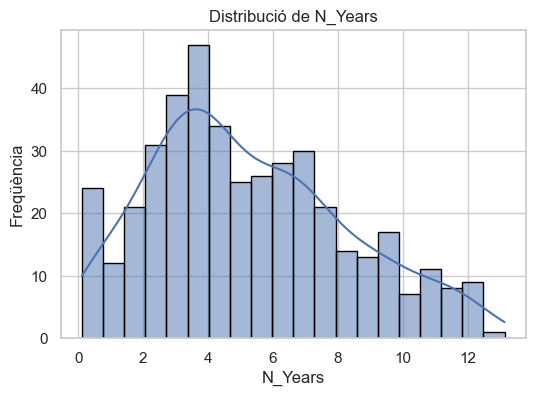

Variable: Age
  Mitjana: 50.74
  Desviació Estàndard: 10.43


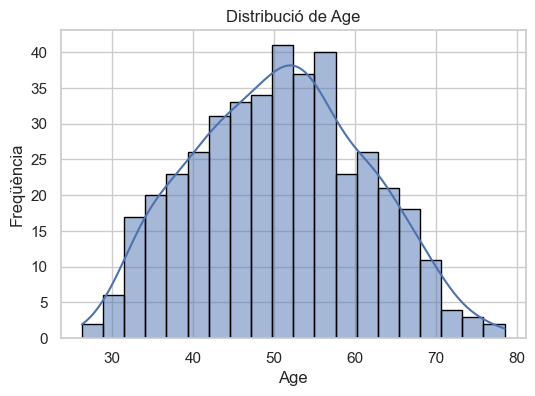

Variable: Bilirubin
  Mitjana: 3.22
  Desviació Estàndard: 4.40


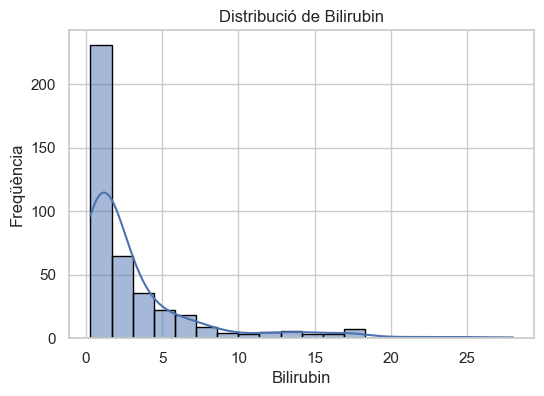

Variable: Cholesterol
  Mitjana: 369.51
  Desviació Estàndard: 231.54


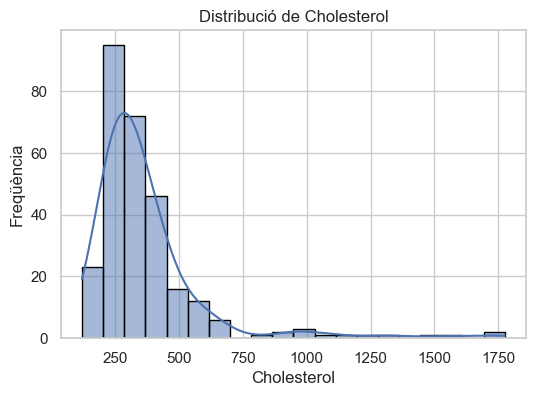

Variable: Albumin
  Mitjana: 3.50
  Desviació Estàndard: 0.42


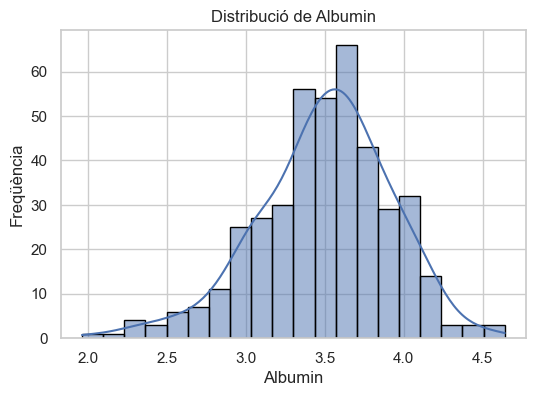

Variable: Copper
  Mitjana: 97.65
  Desviació Estàndard: 85.48


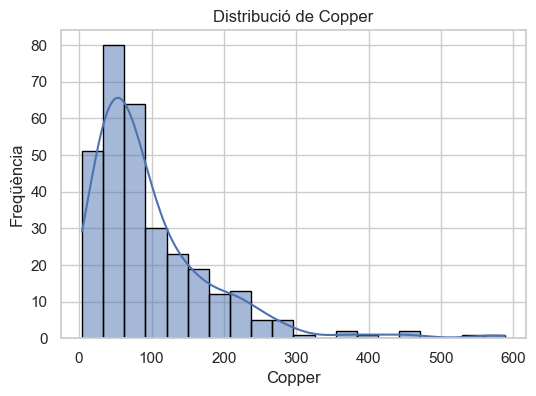

Variable: Alk_Phos
  Mitjana: 1982.66
  Desviació Estàndard: 2136.96


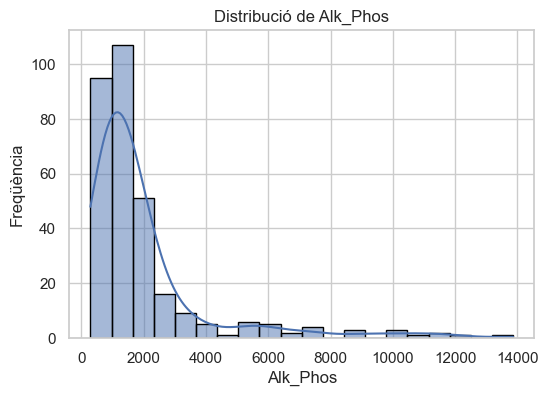

Variable: SGOT
  Mitjana: 122.56
  Desviació Estàndard: 56.61


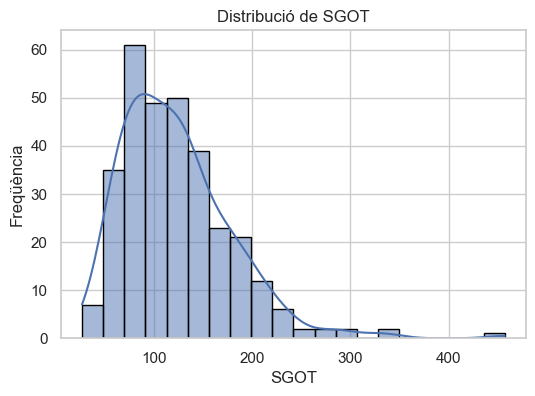

Variable: Tryglicerides
  Mitjana: 124.70
  Desviació Estàndard: 65.03


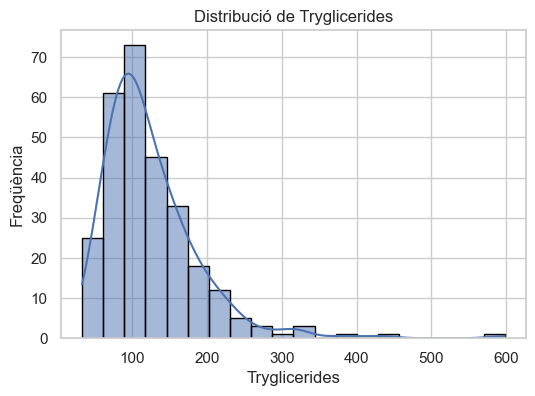

Variable: Platelets
  Mitjana: 257.02
  Desviació Estàndard: 98.20


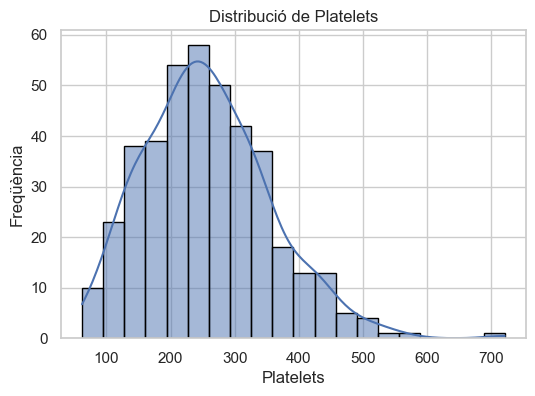

Variable: Prothrombin
  Mitjana: 10.73
  Desviació Estàndard: 1.02


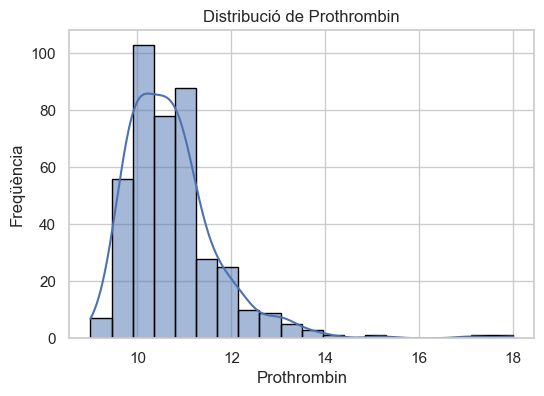

In [212]:
#afegir que per cada grafic et digui la mitjana i la variació estàndard
for column in var_num:
    mitjana = np.mean(data[column])
    desviacio_estandard = np.std(data[column])
    
    # Imprimir valores
    print(f"Variable: {column}")
    print(f"  Mitjana: {mitjana:.2f}")
    print(f"  Desviació Estàndard: {desviacio_estandard:.2f}")

    plt.figure(figsize=(6, 4))
    sns.histplot(data[column], bins=20, kde=True, edgecolor='black')
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()

In [213]:
#COMPROBACIÓ DE NORMALITAT DE CADA DISTRIBUCIÓ
from scipy import stats
for column in var_num:
    agostino_test_var = stats.normaltest(data[column])

    if agostino_test_var[1] <= 0.05:
        print(column, '-->', 'p-value =', agostino_test_var[1],'-->', 'NO es normal')
    else:
        print(column, '-->', 'p-value =', agostino_test_var[1],'-->', 'SI es normal')

N_Years --> p-value = 2.3965085532341455e-05 --> NO es normal
Age --> p-value = 0.000784786891844702 --> NO es normal
Bilirubin --> p-value = 4.018403412610257e-56 --> NO es normal
Cholesterol --> p-value = nan --> SI es normal
Albumin --> p-value = 0.00010052555707024339 --> NO es normal
Copper --> p-value = nan --> SI es normal
Alk_Phos --> p-value = nan --> SI es normal
SGOT --> p-value = nan --> SI es normal
Tryglicerides --> p-value = nan --> SI es normal
Platelets --> p-value = nan --> SI es normal
Prothrombin --> p-value = nan --> SI es normal


#### 1.4. VARIABLES CATEGÒRIQUES

In [214]:
var_cat = [feature for feature in data.columns if data[feature].dtypes == 'O' or data[feature].dtypes == 'category']
print('Number of categorical variables: ', len(var_cat))
print('*'*80)
print('Categorical variables column name:',var_cat)

Number of categorical variables:  8
********************************************************************************
Categorical variables column name: ['Status', 'Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Stage']


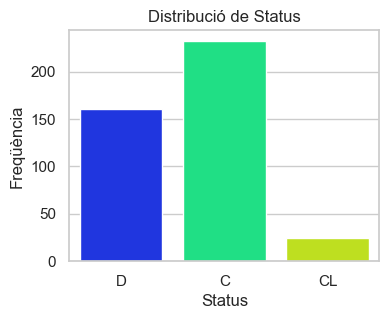

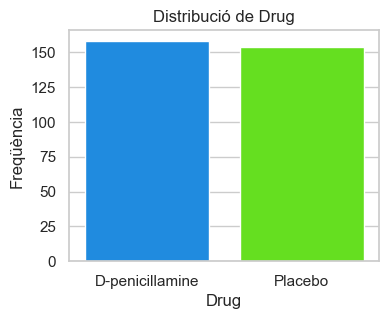

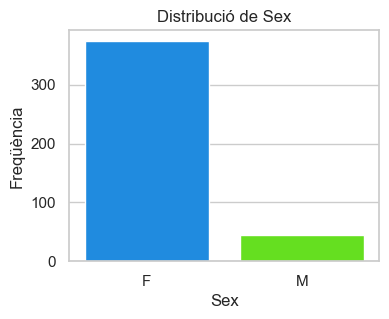

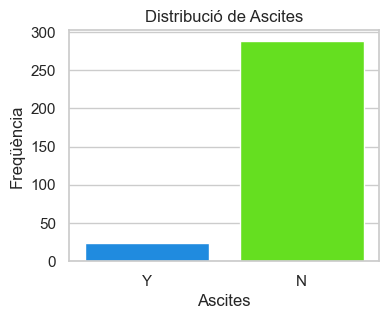

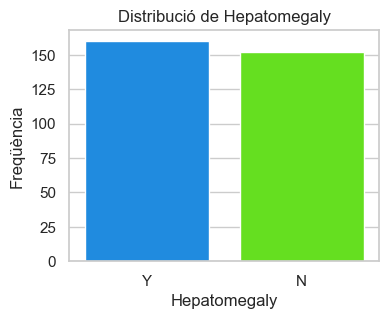

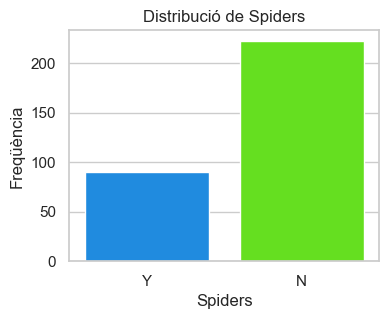

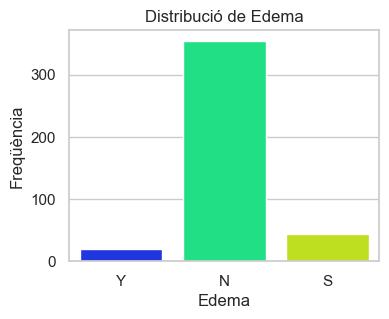

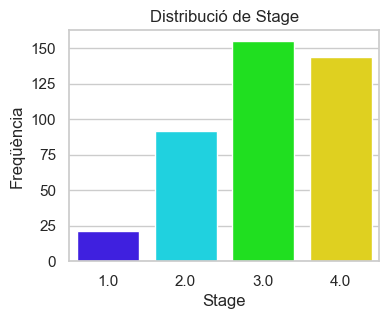

In [215]:
for column in var_cat:
    plt.figure(figsize=(4, 3))
    sns.countplot(x=column, hue=column, data=data, palette="gist_rainbow_r", legend=False)
    plt.title(f'Distribució de {column}')
    plt.xlabel(column)
    plt.ylabel('Freqüència')
    plt.show()

#### 1.5. BIVARIATE AMB LA VARIABLE OBJECTIU

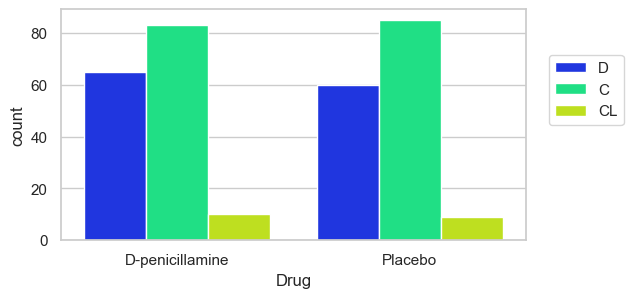

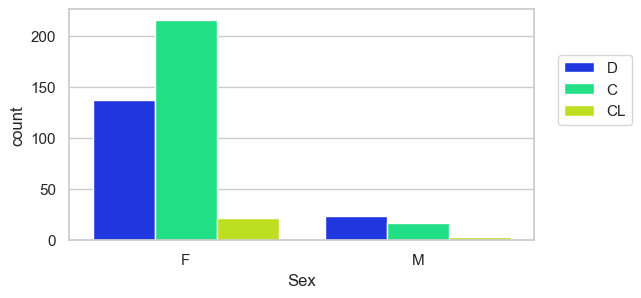

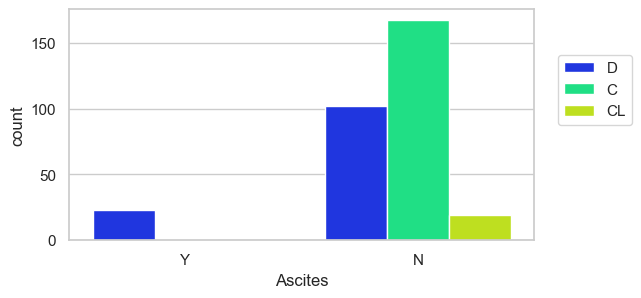

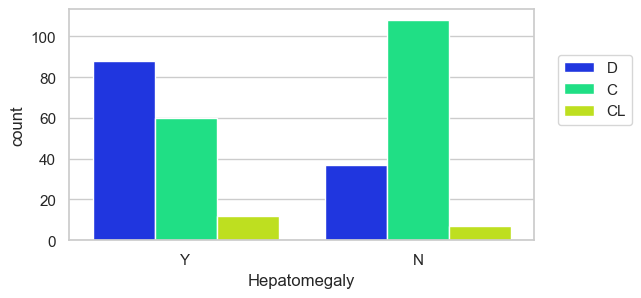

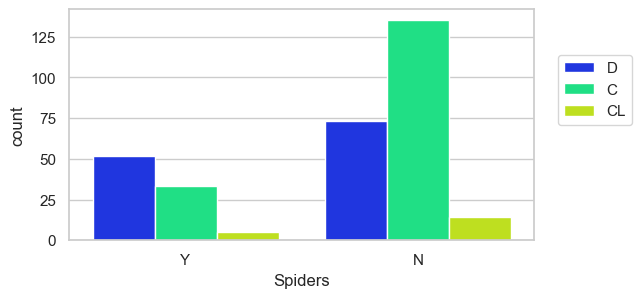

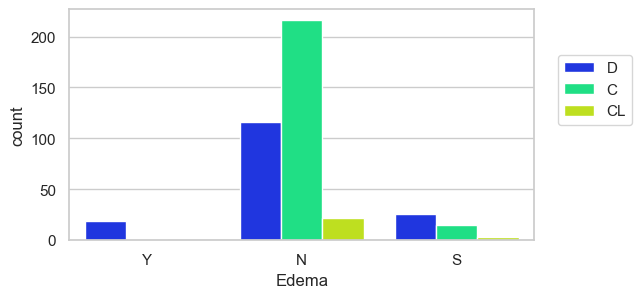

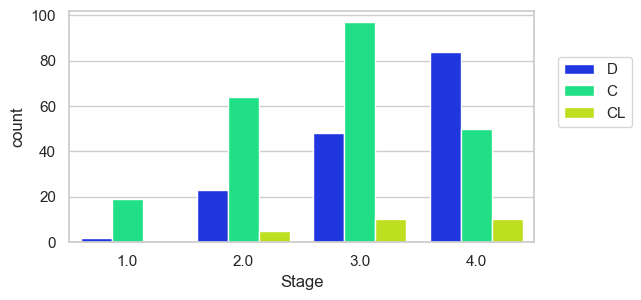

In [216]:
for variable in var_cat[1:]:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.countplot(data=data, x=variable, hue='Status', palette='gist_rainbow_r')
    plt.legend(loc=(1.05, 0.5))
    plt.show()

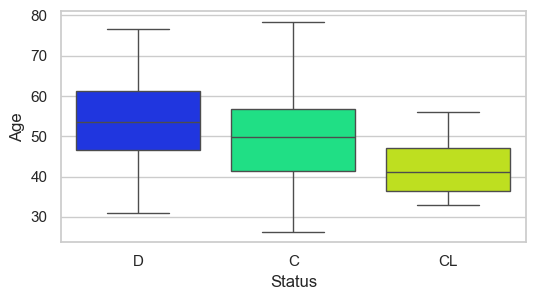

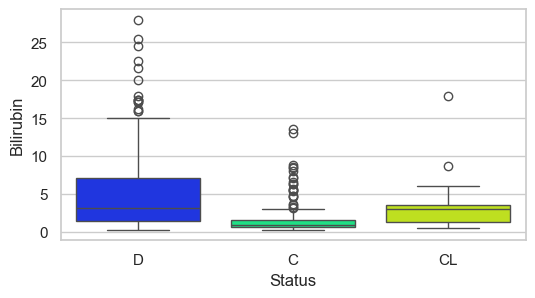

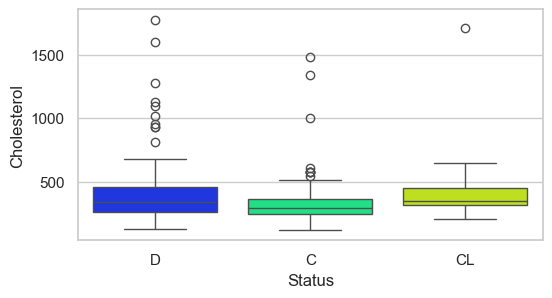

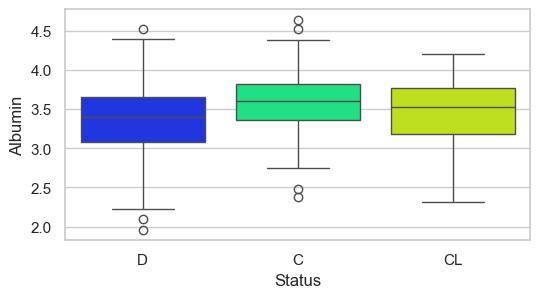

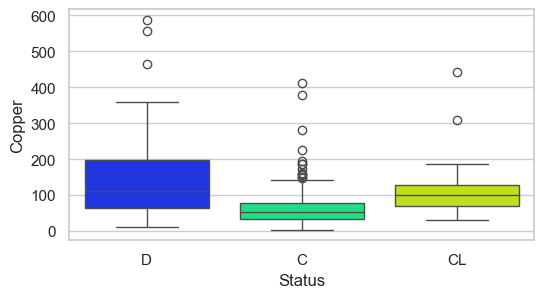

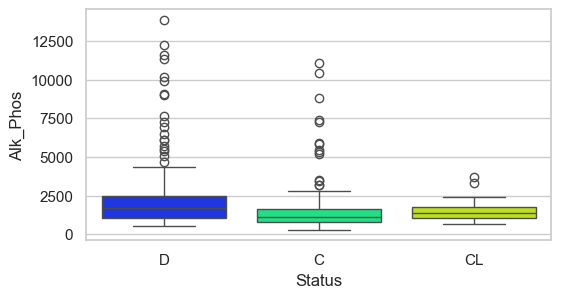

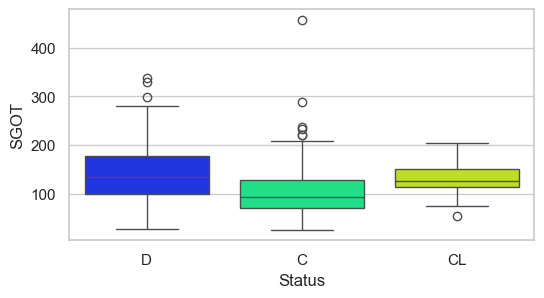

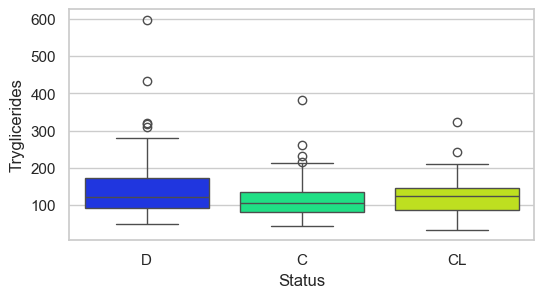

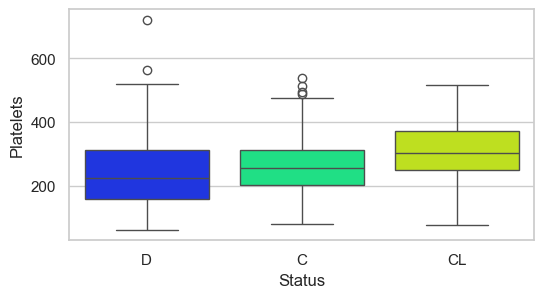

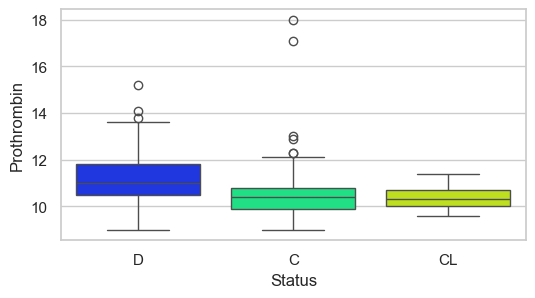

In [217]:
for variable in var_num[1:]:
    plt.figure(figsize=(6, 3), dpi=100)
    sns.boxplot(data=data, x='Status',hue='Status', y=variable, palette='gist_rainbow_r')
    plt.show()

#### 1.6. OBSERVACIÓ OUTLIERS

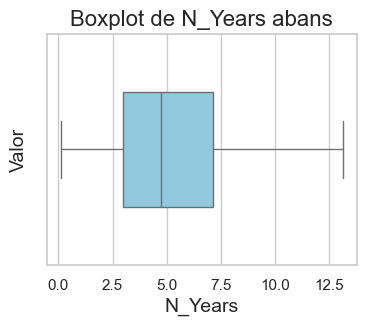

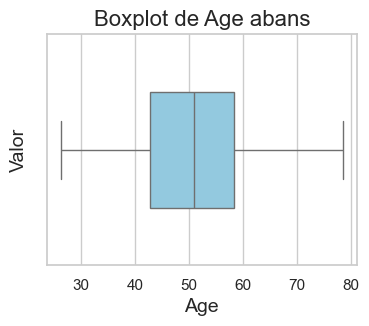

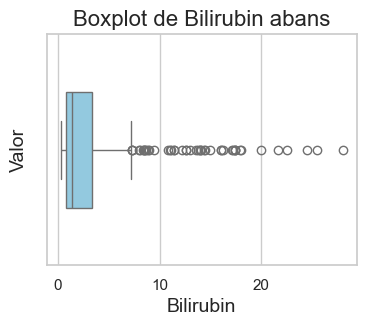

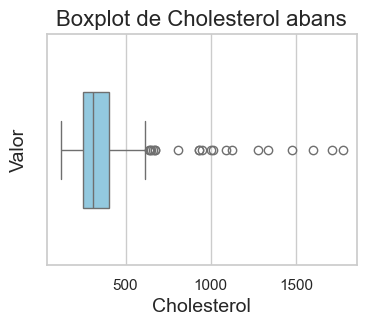

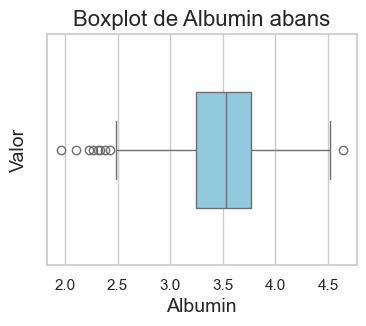

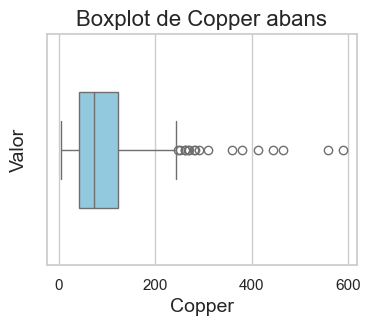

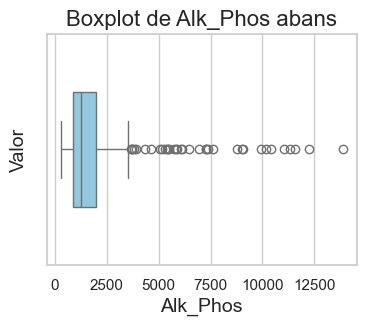

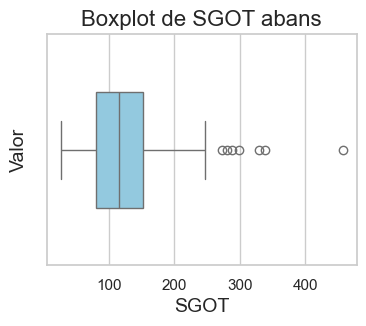

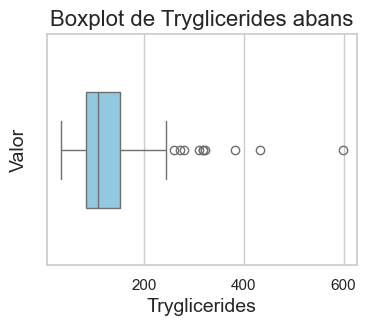

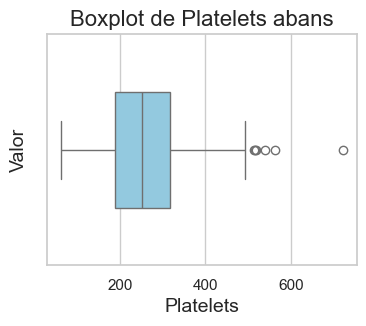

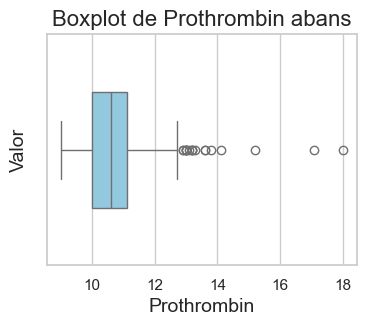

In [218]:
for columna in var_num:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=data[columna], color='skyblue', width=0.5)
    plt.title(f'Boxplot de {columna} abans', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.ylabel('Valor', fontsize=14)
    plt.show()

In [219]:
for column in var_num:
    max_value = data[column].max()
    print(f"El valor más alto en {column} es:", max_value)

El valor más alto en N_Years es: 13.127994524298426
El valor más alto en Age es: 78.43942505133471
El valor más alto en Bilirubin es: 28.0
El valor más alto en Cholesterol es: 1775.0
El valor más alto en Albumin es: 4.64
El valor más alto en Copper es: 588.0
El valor más alto en Alk_Phos es: 13862.4
El valor más alto en SGOT es: 457.25
El valor más alto en Tryglicerides es: 598.0
El valor más alto en Platelets es: 721.0
El valor más alto en Prothrombin es: 18.0


In [220]:
min_value = data['Albumin'].min()
print(f"El valor más alto en Albumin es:", min_value)

El valor más alto en Albumin es: 1.96


In [221]:
#ESTADÍSTICAS OUTLIERS
limites = {
    'Bilirubin': (None, 30),
    'Cholesterol': (None, 1250),
    'Albumin': (1.5, None),  
    'Copper': (None, 1000),
    'Alk_Phos': (None, 8000),
    'SGOT': (None, 400),
    'Tryglicerides': (None, 500),
    'Platelets': (None, 1000),
    'Prothrombin': (None, 25)
}

outlier_stats = []

# Calcular estadísticas per cada variable
for col, (lower_lim, upper_lim) in limites.items():
    lower_lim = -np.inf if lower_lim is None else lower_lim  # Assignar -inf si no hi ha límit inferior
    upper_lim = np.inf if upper_lim is None else upper_lim  # Assignar inf si no hi ha límit superior
    
    small_outlier_count = (data[col] < lower_lim).sum() if lower_lim != -np.inf else 0
    big_outlier_count = (data[col] > upper_lim).sum() if upper_lim != np.inf else 0
    
    # Percentatge de outliers
    total_outliers = small_outlier_count + big_outlier_count
    outlier_percentage = (total_outliers / len(data)) * 100
    
    outlier_stats.append({
        'Variable': col,
        'Lower Outlier Threshold': lower_lim if lower_lim != -np.inf else None,
        'Upper Outlier Threshold': upper_lim if upper_lim != np.inf else None,
        'Small Outlier Count': small_outlier_count,
        'Big Outlier Count': big_outlier_count,
        'Outlier Percentage': outlier_percentage
    })

outlier_df = pd.DataFrame(outlier_stats)
outlier_df


,Variable,Lower Outlier Threshold,Upper Outlier Threshold,Small Outlier Count,Big Outlier Count,Outlier Percentage
0,Bilirubin,NaN,30.0,0,0,0.000000
1,Cholesterol,NaN,1250.0,0,6,1.435407
2,Albumin,1.5,NaN,0,0,0.000000
3,Copper,NaN,1000.0,0,0,0.000000
4,Alk_Phos,NaN,8000.0,0,11,2.631579
5,SGOT,NaN,400.0,0,1,0.239234
6,Tryglicerides,NaN,500.0,0,1,0.239234
7,Platelets,NaN,1000.0,0,0,0.000000
8,Prothrombin,NaN,25.0,0,0,0.000000


##### 1.6.1. Canviem els outliers indicats com missing values

In [222]:
data.isna().sum().sum()

1033

In [223]:
import numpy as np

for col, (lower_lim, upper_lim) in limites.items():
    if lower_lim is not None:
        data[col] = np.where(data[col] < lower_lim, np.nan, data[col])
    if upper_lim is not None:
        data[col] = np.where(data[col] > upper_lim, np.nan, data[col])

In [224]:
data.isna().sum().sum()

1052

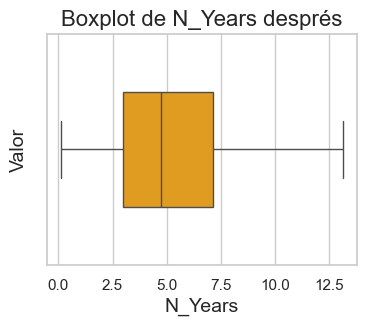

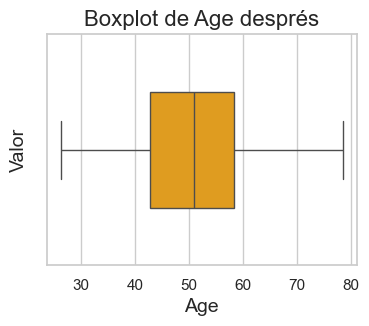

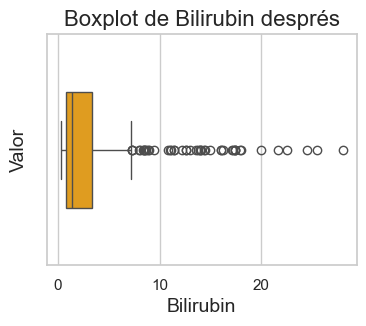

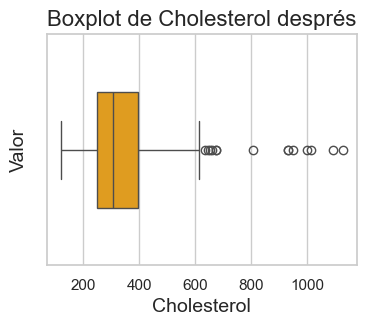

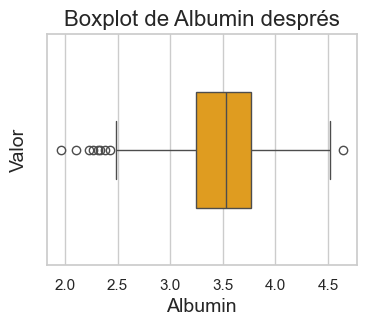

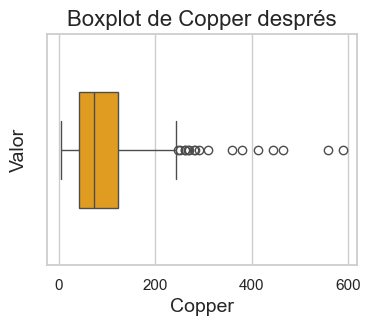

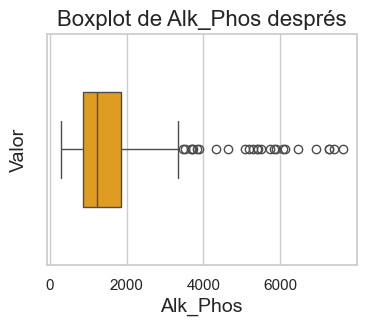

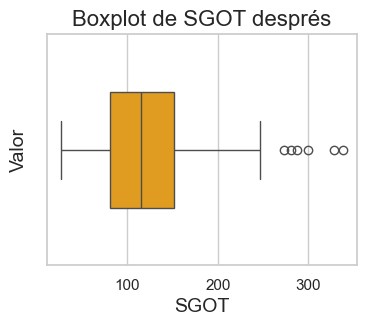

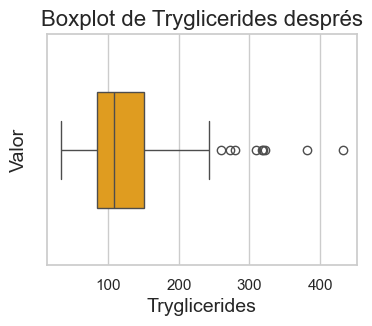

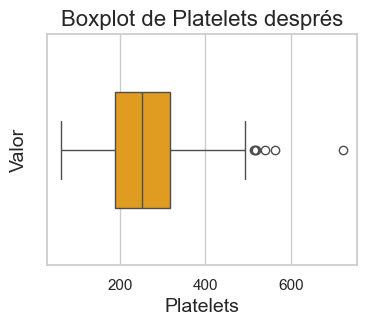

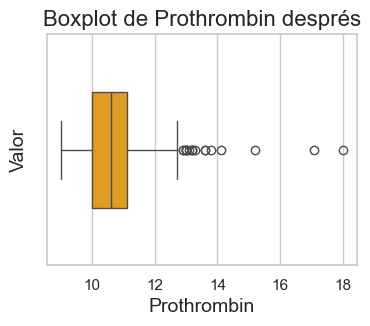

In [225]:
#PLOTS DE DESPRÉS D'INDICAR COM NA ELS OUTLIERS
for columna in var_num:
    plt.figure(figsize=(4, 3))
    sns.boxplot(x=data[columna], color='orange', width=0.5)
    plt.title(f'Boxplot de {columna} després', fontsize=16)
    plt.xlabel(columna, fontsize=14)
    plt.ylabel('Valor', fontsize=14)
    plt.show()

#### 1.7. IMPUTACIÓ

##### 1.7.1 ENCODING

In [226]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

def encode(one_hot):
    if one_hot:
        encoder = OneHotEncoder(sparse_output=False)
    else:
        encoder = OrdinalEncoder()
    return encoder

##### 1.7.2 IMPUTACIÓ KNN

In [227]:
#IMPUTACIÓ PER KNN
from sklearn.impute import KNNImputer

def imputacio_knn(data1):
    data = data1.copy()

    imputer_num = KNNImputer(n_neighbors=5)
    data = imputer_num.fit_transform(data)

    return data

#### 1.8. BALANCEIG DE DADES

In [228]:
data['Status'].value_counts()

Status
C     232
D     161
CL     25
Name: count, dtype: int64

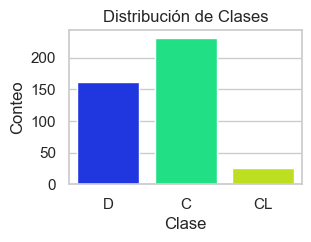

In [229]:
#freqüència de cada classe de la variable objectiu

plt.figure(figsize=(3, 2))
sns.countplot(x='Status', hue='Status', data=data, palette="gist_rainbow_r", legend=False)
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Conteo')
plt.show()

In [230]:
#FUNCIÓ PER PROVAR COM FUNCIONA EL RANDOM OVERSAMPLING

from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

def random_oversampling(X, y):
    random = RandomOverSampler(random_state=42)
    X_resampled, y_resampled = random.fit_resample(X, y)
    return X_resampled, y_resampled

In [231]:
#FUNCIÓ FINAL UTILITZADA EN L'ENTRENAMENT DEL MODEL

def oversampling(X, y, oversamp):
    if oversamp:
        smote = SMOTE(random_state=42)
        X_resampled, y_resampled = smote.fit_resample(X, y)
        return X_resampled, y_resampled
    return X, y

## 2. PREPARACIÓ DE VARIABLES

### 2.1. NORMALITZACIÓ DE VARIABLES (VISUALITZACIÓ)

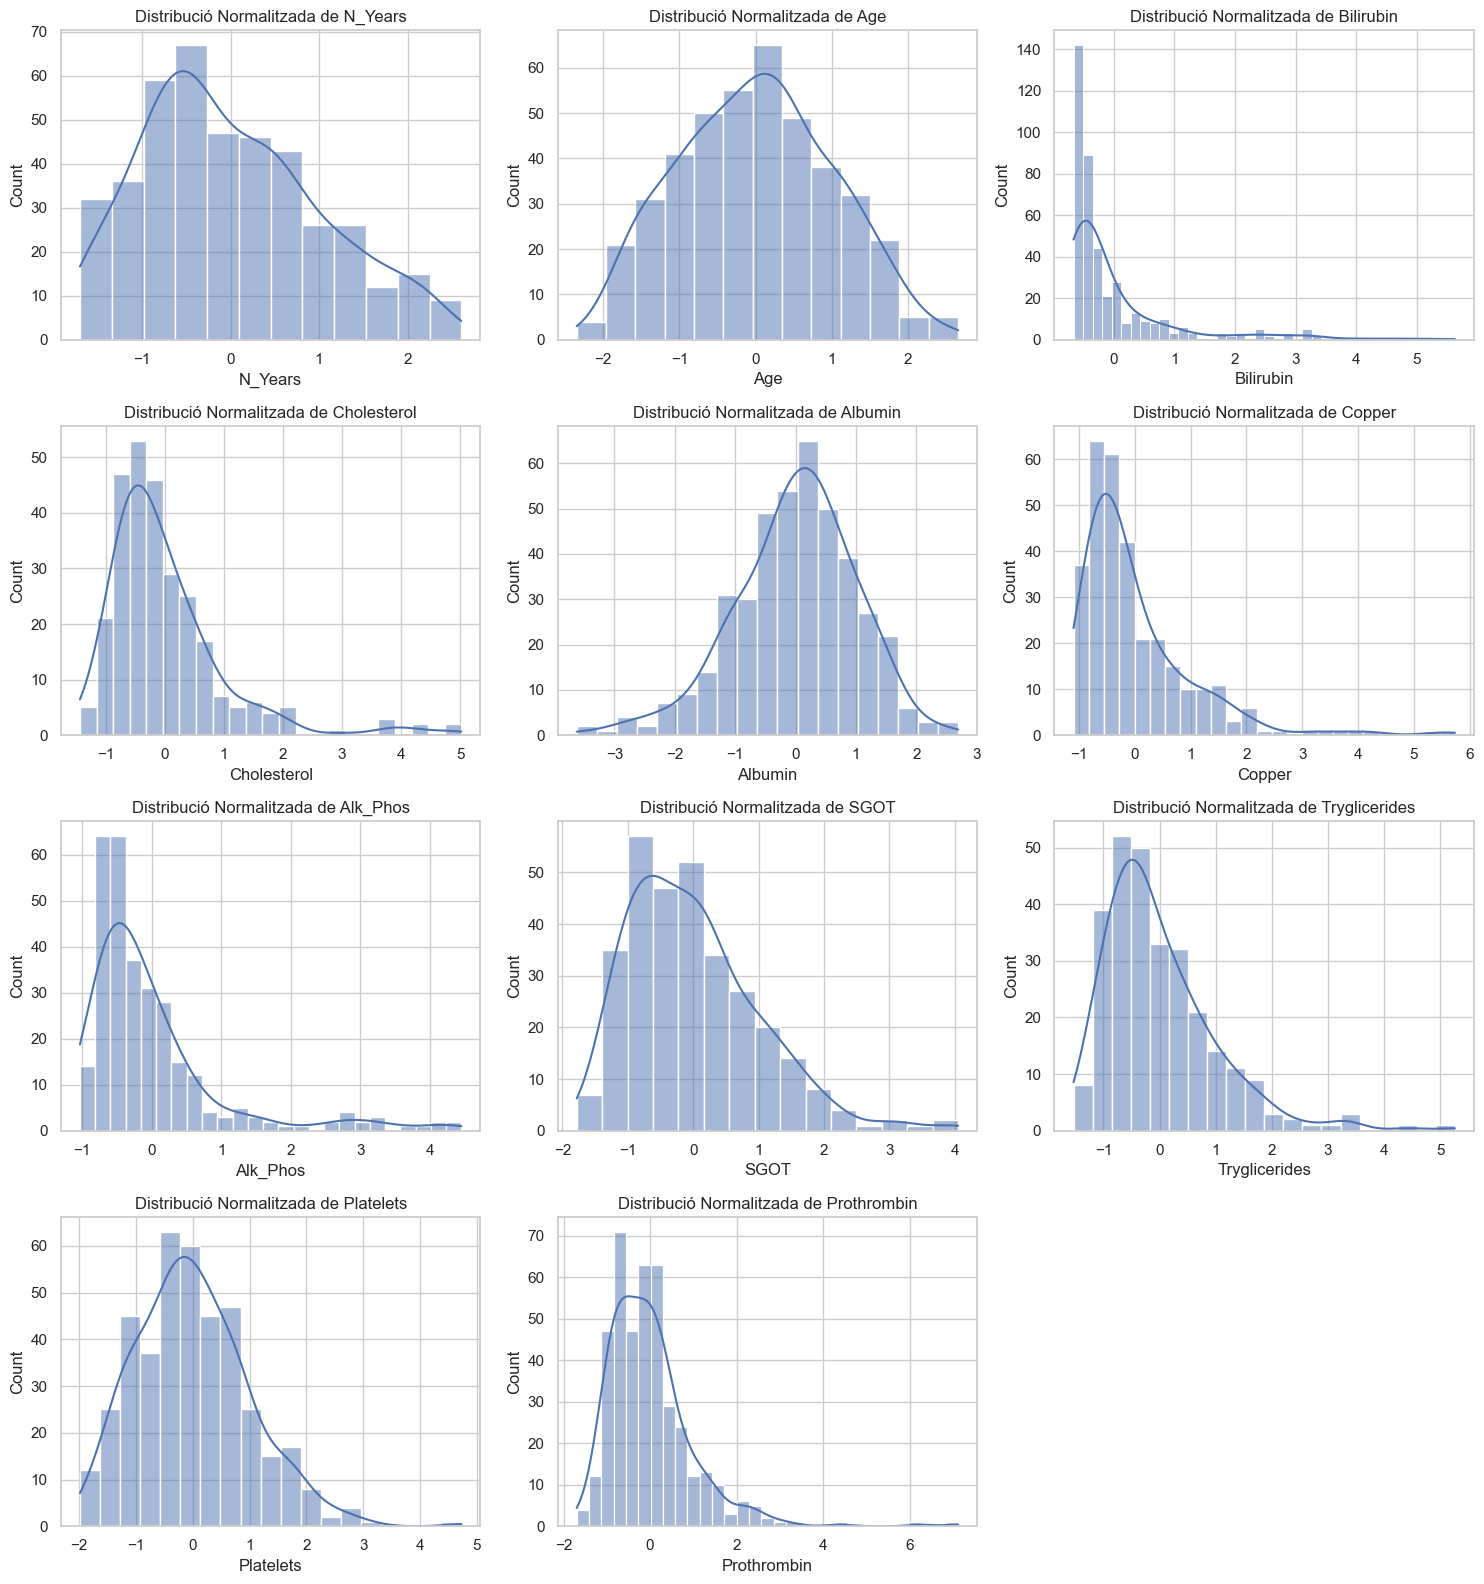

In [232]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

def normalitzar(data1):
    data = data1.copy()

    # Identificar columnes numèriques
    numeriques = data.select_dtypes(include=['float64', 'int64']).columns.tolist()

    # Normalitzar columnes numèriques
    scaler = StandardScaler()
    data[numeriques] = scaler.fit_transform(data[numeriques])

    n_vars = len(numeriques)
    n_cols = 3
    n_rows = n_vars // n_cols + (n_vars % n_cols > 0)

    plt.figure(figsize=(n_cols * 5, n_rows * 4))
    for i, col in enumerate(numeriques):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(data[col], kde=True)
        plt.title(f'Distribució Normalitzada de {col}')
        plt.tight_layout()

    plt.show()
    
normalitzar(data)

### 2.2. MATRIU DE CORRELACIONS

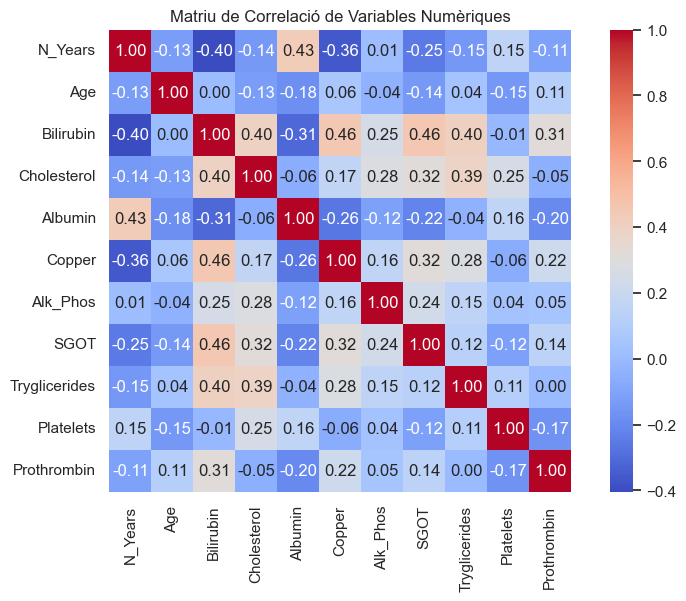

In [233]:
corr_matrix = data[var_num].corr()

plt.figure(figsize=(10, 6)) 
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Matriu de Correlació de Variables Numèriques')
plt.show()

### 2.3. ELIMINACIÓ DE VARIABLES REDUNDANTS

In [234]:
from scipy.stats import chi2_contingency

categoriques =  data.select_dtypes(include=['category', 'object']).columns.tolist()
for var in categoriques[1:]:

    contingency_table = pd.crosstab(data[var], data['Status'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    print(f"Chi-square test for {var}: chi2 = {chi2}, p-value = {p}")

Chi-square test for Drug: chi2 = 0.22519606594984942, p-value = 0.8935097493959961
Chi-square test for Sex: chi2 = 5.858291641994132, p-value = 0.053442668259367894
Chi-square test for Ascites: chi2 = 33.684496031746036, p-value = 4.847352734918798e-08
Chi-square test for Hepatomegaly: chi2 = 35.656389711119914, p-value = 1.8084785078818633e-08
Chi-square test for Spiders: chi2 = 16.898264905507013, p-value = 0.00021408606460213462
Chi-square test for Edema: chi2 = 40.48334830163611, p-value = 3.438280896422362e-08
Chi-square test for Stage: chi2 = 48.11983674296924, p-value = 1.1182284228273419e-08


In [235]:
#ELIMINAR DRUG
data = data.drop('Drug', axis=1)

### 2.4. PCA

In [236]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA

def pca(data1):
    X = data1.copy()
    X = X.drop('Status', axis=1)
    y = data1['Status']
    
    numeriques = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X.select_dtypes(include=['category', 'object']).columns.tolist()

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    #eliminem les categoriques de data
    data_no_cat = X_train.drop(columns=categoriques)

    #imputem
    numeriques = data_no_cat.select_dtypes(include=['float64', 'int64']).columns.tolist()
    imputer_num = KNNImputer(n_neighbors=5)
    data_no_cat[numeriques] = imputer_num.fit_transform(data_no_cat[numeriques])

    #normalitzem
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data_no_cat[numeriques])
    
    pca = PCA()  
    data_pca = pca.fit_transform(data_scaled)
    var_exp = pca.explained_variance_ratio_

    #PLOT 1
    plt.figure(figsize=(6, 4))
    cum_var_exp = np.cumsum(var_exp)
    colors = plt.cm.plasma(cum_var_exp / cum_var_exp[-1])
    plt.bar(range(1, len(cum_var_exp) + 1), cum_var_exp, color=colors)
    plt.axhline(y=0.8, color='r', linestyle='-')
    plt.ylabel('Variància Explicada Acumulada')
    plt.xlabel('Components')
    plt.title('Variància Explicada Acumulada pel Anàlisi de Components Principals amb Llindar del 80%')
    plt.tight_layout()
    plt.show()

    print('VARIÀNCIA ACUMULADA: ', var_exp)

    #PLOT2
    plt.figure(figsize=(7, 5))
    plt.axhline(y=0, color='grey', lw=1)
    plt.axvline(x=0, color='grey', lw=1)
    for i, col in enumerate(numeriques):
        plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], 
                color='pink', alpha=0.5, head_width=0.05, head_length=0.05)
        plt.text(pca.components_[0, i], pca.components_[1, i], col, color='black')

    plt.xlim(-0.4, 0.6)
    plt.ylim(-0.4, 0.6)
    plt.xlabel('Primer Component Principal')
    plt.ylabel('Segon Component Principal')
    plt.title('Projecció de les variables numèriques en els dos primers Components Principals')
    plt.tight_layout()
    plt.show()


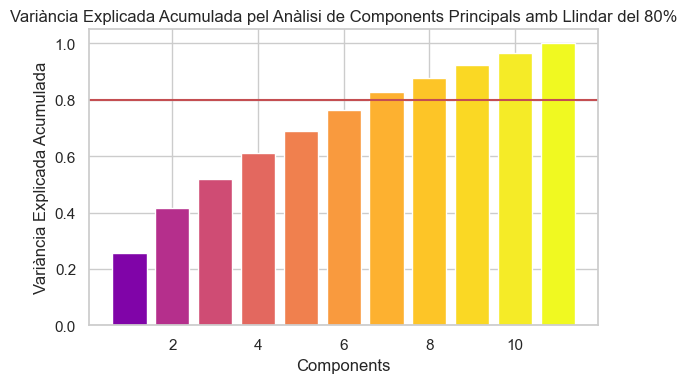

VARIÀNCIA ACUMULADA:  [0.25538386 0.15974544 0.10263077 0.09271492 0.077424   0.0745099
 0.06427227 0.05177605 0.04512954 0.04339832 0.03301492]


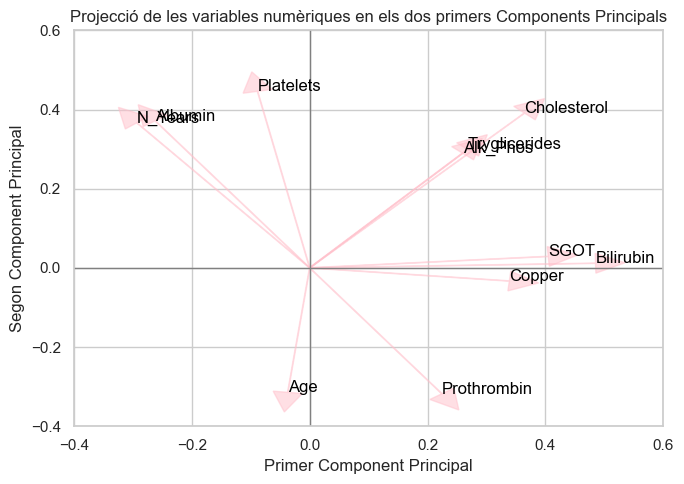

In [237]:
pca(data)

## 3. DEFINICIÓ DE MODELS

#### 3.2. DEFINICIÓ DE MÈTRIQUES

In [238]:
#PER VISUALITZAR LA MATRIU DE CONFUSIÓ

def matriu_confusio(y_test, conf_matrix):
    classes = np.unique(y_test)
    plt.figure(figsize=(5, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title('Matriu de Confusió')
    plt.xlabel('Prediccions')
    plt.ylabel('Valors Reals')
    plt.show()

In [239]:
#PER VISUALITZAR LA CORBA ROC

from sklearn.metrics import auc, roc_curve
from sklearn.preprocessing import label_binarize
from itertools import cycle

def corba_roc(y_test, model, X_test_imputed):

    y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
    y_scores = model.predict_proba(X_test_imputed)

    # Calcular la corba ROC i l'AUC per a cada classe
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    n_classes = y_scores.shape[1]

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_scores[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Visualització
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Some extension of Receiver Operating Characteristic to multi-class')
    plt.legend(loc="lower right")
    plt.show()

In [240]:
#ENTRENAMENT DEL MODEL

from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.metrics import accuracy_score, f1_score, recall_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder


def entrenament(data1, model, parametres = None, stand=False, apply_oversampling=False, one_hot=False):
    X = data1.copy()
    X = X.drop('Status', axis=1)
    y = data1['Status']

    numeriques = X.select_dtypes(include=['float64', 'int64']).columns.tolist()
    categoriques = X.select_dtypes(include=['category', 'object']).columns.tolist()

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    encoder = encode(one_hot=one_hot)
    train_encoded = encoder.fit_transform(X_train[categoriques])
    val_encoded = encoder.transform(X_val[categoriques])
    test_encoded = encoder.transform(X_test[categoriques])

    X_train_combined = np.concatenate((X_train[numeriques], train_encoded), axis=1)
    X_val_combined = np.concatenate((X_val[numeriques], val_encoded), axis=1)
    X_test_combined = np.concatenate((X_test[numeriques], test_encoded), axis=1)

    if stand:
        scaler = StandardScaler()
        X_train_combined = scaler.fit_transform(X_train_combined)
        X_val_combined = scaler.transform(X_val_combined)
        X_test_combined = scaler.transform(X_test_combined)

    X_train_imputed = imputacio_knn(X_train_combined)
    X_val_imputed = imputacio_knn(X_val_combined)
    X_test_imputed = imputacio_knn(X_test_combined)

    X_train_resampled, y_train_resampled = oversampling(X_train_imputed, y_train, oversamp=apply_oversampling)

    if parametres:
        best_score = 0
        best_params = {}

        for params in ParameterGrid(parametres):
            model.set_params(**params)
            model.fit(X_train_resampled, y_train_resampled)
            predictions = model.predict(X_val_imputed)

            f1 = f1_score(y_val, predictions, average='weighted')
            accuracy = accuracy_score(y_val, predictions)
            recall = recall_score(y_val, predictions, average='weighted')
            val_conf_matrix = confusion_matrix(y_val, predictions)
            
            if f1 > best_score:
                best_score = f1
                best_params = params
                best_accuracy = accuracy
                best_recall = recall
                best_conf_matrix = val_conf_matrix 
        
        print(f"Millors paràmetres trobats al validation: {best_params}, F1 score: {best_score}, Accuracy: {best_accuracy}, Recall: {best_recall}")
        matriu_confusio(y_val, best_conf_matrix)
        model.set_params(**best_params)
    
    model.fit(X_train_resampled, y_train_resampled)

    #AVALUACIÓ TRAIN

    train_predictions = model.predict(X_train_imputed)
    train_accuracy = accuracy_score(y_train, train_predictions)
    train_f1 = f1_score(y_train, train_predictions, average='weighted')
    train_recall = recall_score(y_train, train_predictions, average='weighted')
    train_conf_matrix = confusion_matrix(y_train, train_predictions)

    print(f"Accuracy en entrenament: {train_accuracy}, F1-Score en entrenament: {train_f1}, Recall en entrenament: {train_recall}")
    matriu_confusio(y_train, train_conf_matrix)
    corba_roc(y_train, model, X_train_imputed)


    #AVALUACIÓ TEST

    y_pred = model.predict(X_test_imputed)
    y_proba = model.predict_proba(X_test_imputed)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    conf_matrix = confusion_matrix(y_test, y_pred)

    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}")
    matriu_confusio(y_test, conf_matrix)
    corba_roc(y_test, model, X_test_imputed)

    return model, train_accuracy, train_f1, train_recall

#### KNN

Millors paràmetres trobats al validation: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}, F1 score: 0.7062777062777061, Accuracy: 0.746031746031746, Recall: 0.746031746031746


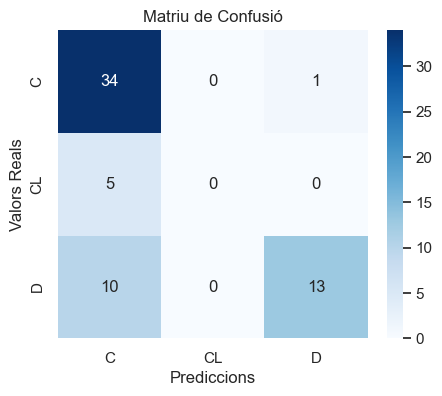

Accuracy en entrenament: 0.7705479452054794, F1-Score en entrenament: 0.7434720033835682, Recall en entrenament: 0.7705479452054794


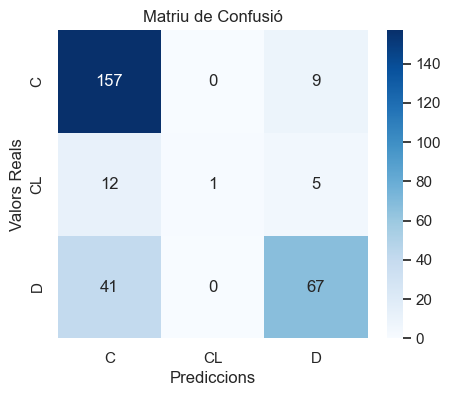

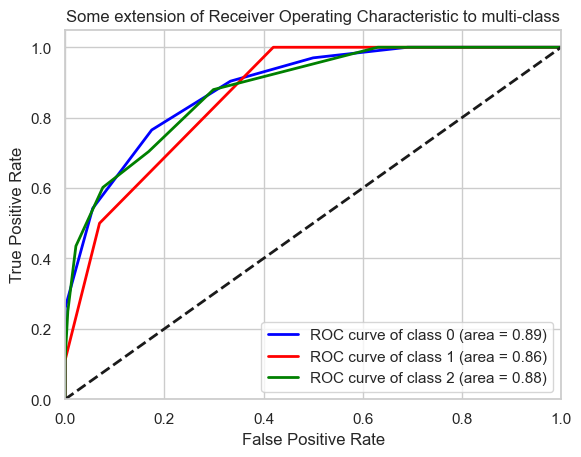

Accuracy: 0.7936507936507936, F1 Score: 0.7803082585691281, Recall: 0.7936507936507936


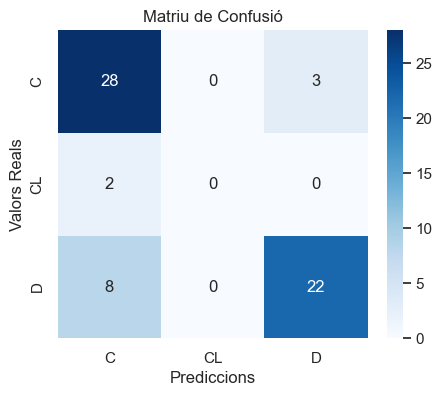

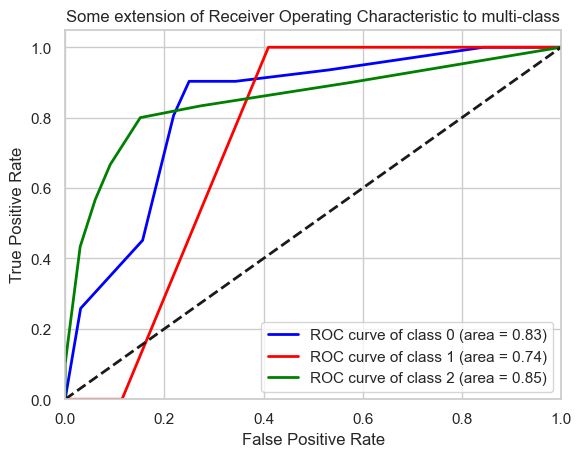

In [241]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

parametres_knn = {
    'n_neighbors' : [5, 7, 9, 11],
    'weights' : [ 'uniform','distance'],
    'metric' : ['euclidean', 'manhattan']
}

model, accuracy, f1, recall = entrenament(data, model, parametres=parametres_knn, stand=True, apply_oversampling=False, one_hot=False)

#### DECISION TREE

Millors paràmetres trobats al validation: {'class_weight': None, 'criterion': 'entropy', 'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'random_state': 42, 'splitter': 'random'}, F1 score: 0.7129984757435739, Accuracy: 0.6984126984126984, Recall: 0.6984126984126984


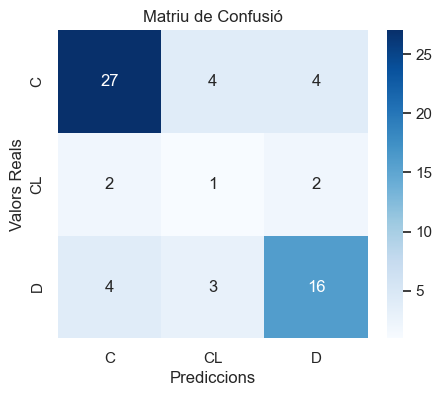

Accuracy en entrenament: 0.821917808219178, F1-Score en entrenament: 0.8238053188179535, Recall en entrenament: 0.821917808219178


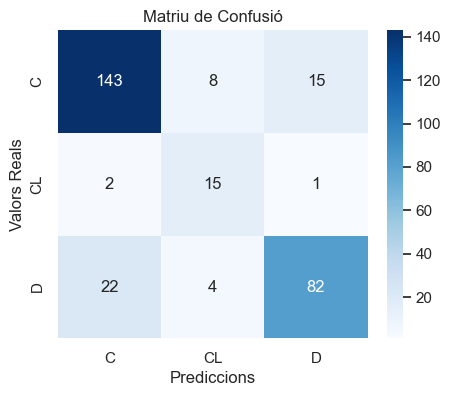

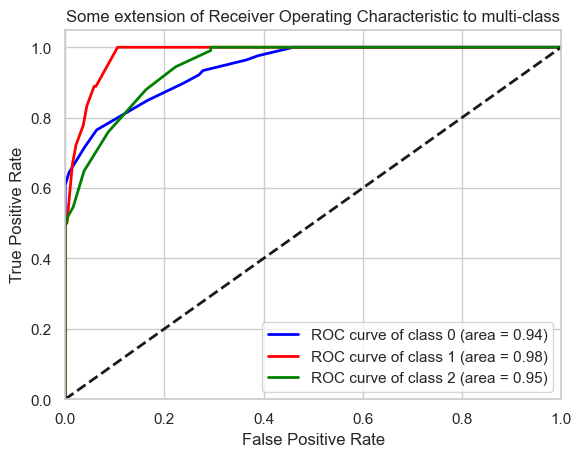

Accuracy: 0.7142857142857143, F1 Score: 0.7321644114096943, Recall: 0.7142857142857143


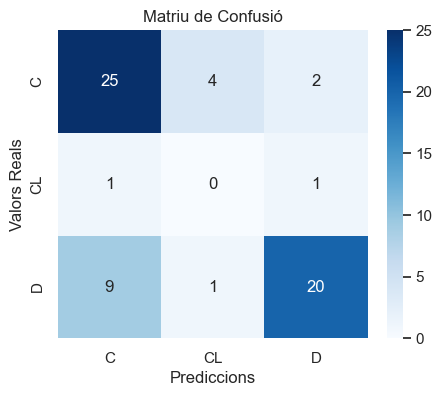

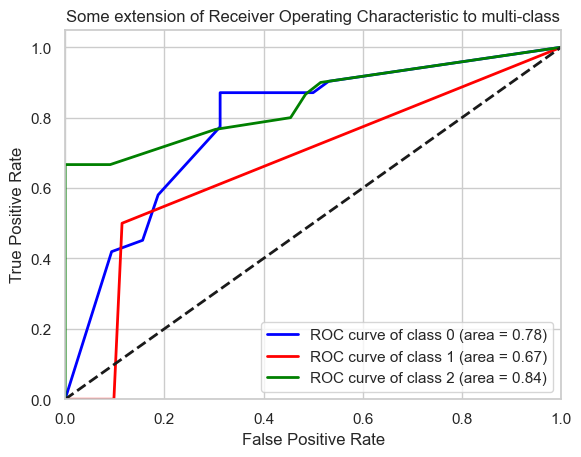

In [242]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

parametres_dt = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'log2', 'sqrt'],
    'class_weight': [None, 'balanced'],
    'random_state': [42]
}

model, accuracy, f1, recall = entrenament(data, model, parametres=parametres_dt, stand=False, apply_oversampling=True,one_hot=True)

#### SVM

Millors paràmetres trobats al validation: {'C': 10, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'shrinking': True, 'tol': 0.001}, F1 score: 0.6939743960429356, Accuracy: 0.7142857142857143, Recall: 0.7142857142857143


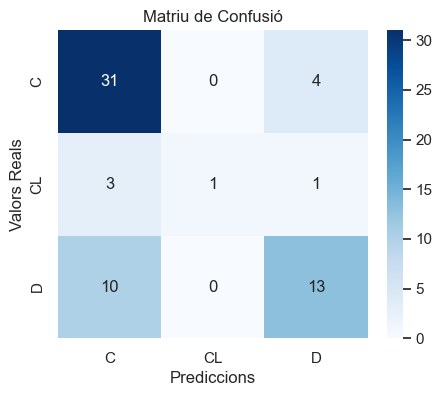

Accuracy en entrenament: 0.9452054794520548, F1-Score en entrenament: 0.9446525866362904, Recall en entrenament: 0.9452054794520548


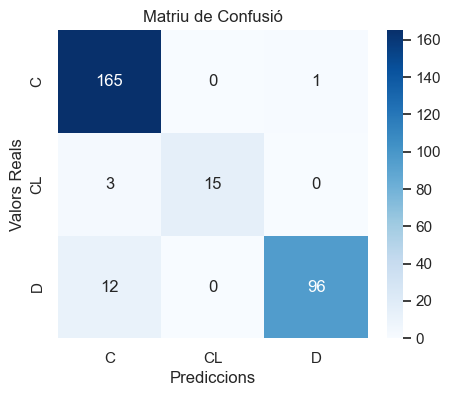

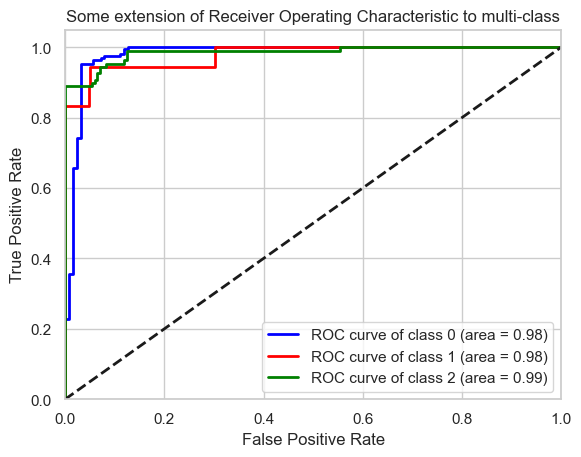

Accuracy: 0.8095238095238095, F1 Score: 0.808946530029385, Recall: 0.8095238095238095


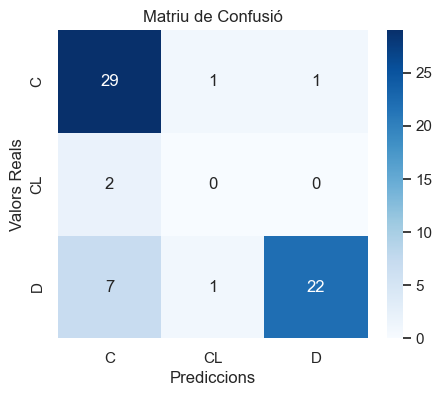

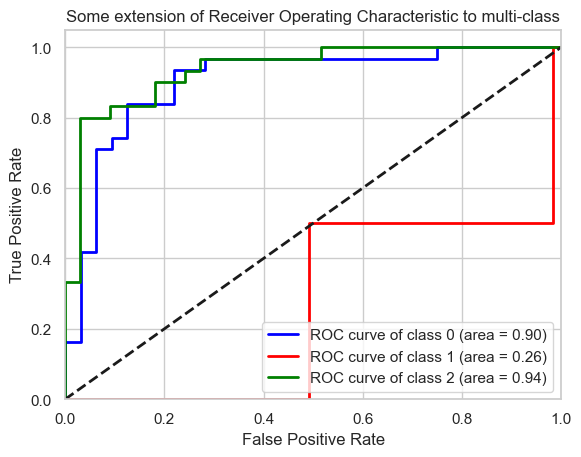

In [243]:
from sklearn.svm import SVC as SVM
model = SVM()

parametres_svm = {
    'C': [1, 10],                    
    'kernel': ['rbf', 'linear'],     
    'gamma': ['scale', 'auto'],             
    'shrinking': [True],           
    'probability': [True],      
    'tol': [1e-3, 1e-5],   
    'class_weight': [None,'balanced']  
}


model, accuracy, f1, recall = entrenament(data, model,parametres=parametres_svm, stand=True, apply_oversampling=False, one_hot=True)

#### VISUALITZAR EL RENDIMENT DEL MODEL TRIAT

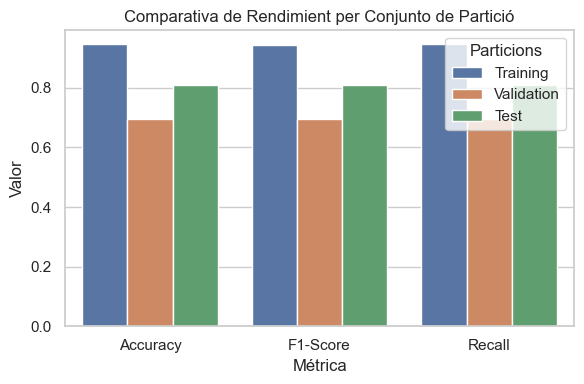

In [248]:
resultats = {
    'Metric': ['Accuracy', 'F1-Score', 'Recall'],
    'Training': [0.9452, 0.9446, 0.9452],
    'Validation': [0.6939, 0.6939, 0.6939],
    'Test': [0.8095, 0.8089, 0.8095]
}

# Creamos el DataFrame
df_performance = pd.DataFrame(resultats)

# Convertimos el DataFrame a un formato adecuado para Seaborn
df_melted = df_performance.melt('Metric', var_name='Dataset', value_name='Score')

# Crear el gráfico
plt.figure(figsize=(6, 4))
sns.barplot(x='Metric', y='Score', hue='Dataset', data=df_melted)
plt.title('Comparativa de Rendimient per Conjunto de Partició')
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.legend(title='Particions')
plt.tight_layout()
plt.show()

### BONUS 1

In [245]:
from interpret.glassbox import ExplainableBoostingClassifier
from sklearn.model_selection import GridSearchCV

model = ExplainableBoostingClassifier(interactions=0)

In [ ]:
import matplotlib.cm as cm
model, accuracy, f1, recall = entrenament(data, model, stand=True, apply_oversampling=False, one_hot=False)

# Get the feature importances from the model
importances = model.feature_importances_

# Replace this with your actual list of feature names
feature_names = data.columns.tolist()
feature_names.remove('Status')

# Ensure 'feature_names' contains the correct number of feature names
assert len(feature_names) == len(importances), "Number of features and importances must match"

# Printing feature importances
for feature, importance in zip(feature_names, importances):
    print(f"{feature}: {importance}")

# Creating a color gradient for the bars
colors = cm.viridis(np.linspace(0, 1, len(importances)))

# Creating a bar chart for visualizing the feature importances
plt.figure(figsize=(10, 6))  # Adjust figure size to give more room
plt.bar(feature_names, importances, color=colors)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances in EBMModel')
plt.xticks(rotation=45, ha='right')  # Rotate labels and align for better readability
plt.tight_layout()  # Adjust layout to fit everything neatly
#plt.savefig('../images/feature_importances_ebm.png')
plt.show()

### BONUS 2

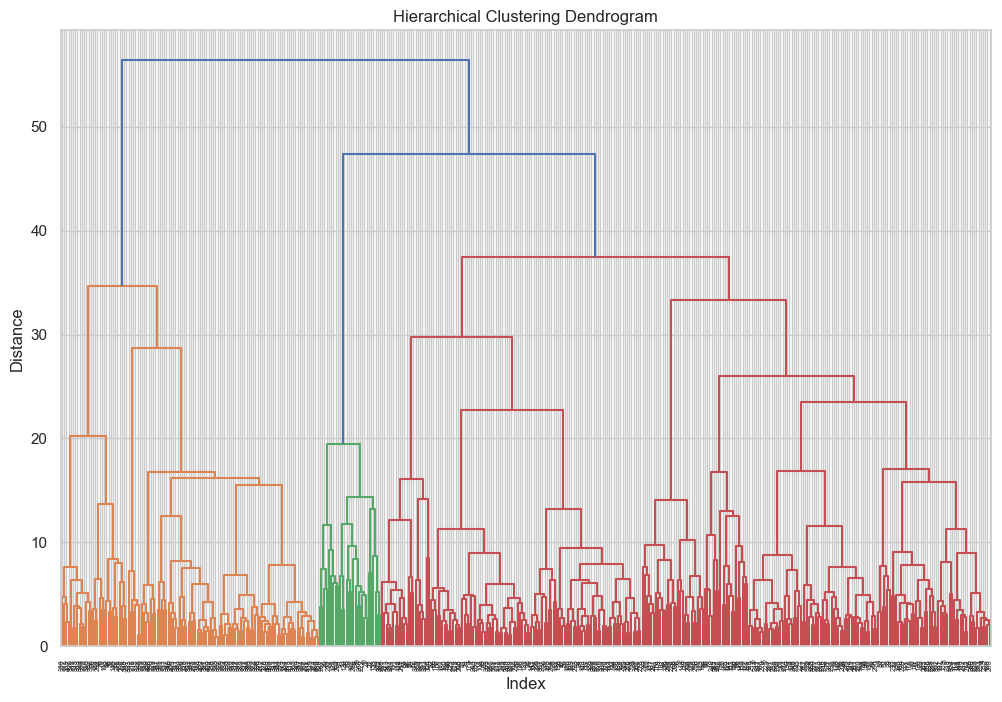

Suggested number of clusters: 9


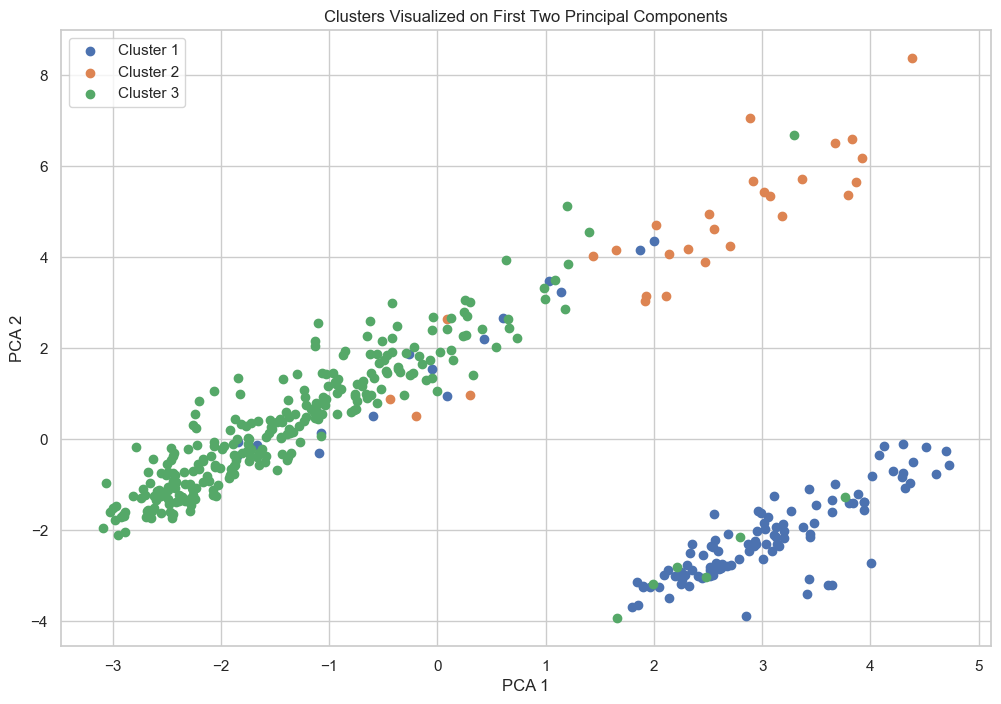

Profiling for Cluster 1
Numeric variables statistics:
          N_Years         Age   Bilirubin  Cholesterol     Albumin  \
count  116.000000  116.000000  116.000000    13.000000  116.000000   
mean     4.576813   53.006727    3.126724   289.692308    3.431207   
std      2.809300   10.259707    4.020088    64.445564    0.412138   
min      0.112252   32.999316    0.400000   220.000000    2.310000   
25%      2.709788   45.205339    0.700000   244.000000    3.150000   
50%      3.938398   52.499658    1.300000   280.000000    3.465000   
75%      6.294319   62.001369    3.150000   317.000000    3.682500   
max     11.586585   75.011636   18.000000   432.000000    4.520000   

           Copper     Alk_Phos        SGOT  Tryglicerides   Platelets  \
count   15.000000    15.000000   16.000000      13.000000  110.000000   
mean    82.466667  1425.733333  127.876875     101.153846  238.145455   
std     65.944638   500.496963   54.961528      46.863003  104.920401   
min     14.000000   733

In [258]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
import matplotlib.pyplot as plt

original_index = data.index
clustering_data = data.copy()
clustering_data.drop(columns=['Status'], inplace=True)

numeriques = clustering_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
categoriques = clustering_data.select_dtypes(include=['category', 'object']).columns.tolist()

encoder = encode(one_hot=True)
encoded = encoder.fit_transform(clustering_data[categoriques])

combined = np.concatenate((clustering_data[numeriques].values, encoded), axis=1)

clustering_data_imputed = imputacio_knn(combined)

scaler = StandardScaler()
clustering_data_scaled = scaler.fit_transform(clustering_data_imputed)


Z = linkage(clustering_data_scaled, 'ward')

#DENDOGRAMA
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=original_index)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Index')
plt.ylabel('Distance')
plt.show()

max_d = 25
clusters = fcluster(Z, max_d, criterion='distance')
num_clusters = len(np.unique(clusters))
print(f'Suggested number of clusters: {num_clusters}')

k = 3
clusters = fcluster(Z, k, criterion='maxclust')

clustering_data['Cluster'] = clusters

pca = PCA(n_components=2)
pca_data = pca.fit_transform(clustering_data_scaled)

pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

pca_df['Cluster'] = clusters

#CLUSTERS
plt.figure(figsize=(12, 8))
for i in range(1, k+1):
    plt.scatter(pca_df[pca_df['Cluster'] == i]['PCA1'], pca_df[pca_df['Cluster'] == i]['PCA2'], label=f'Cluster {i}')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Clusters Visualized on First Two Principal Components')
plt.legend()
plt.show()

#PROFILING
for i in range(1, k+1):
    cluster_data = clustering_data[clustering_data['Cluster'] == i]
    print(f'Profiling for Cluster {i}')
    print(f'Numeric variables statistics:')
    print(cluster_data.describe())
    print(f'Categorical variables statistics:')
    print(cluster_data.describe(include=['category']))  # This provides a statistical summary that can be used for profiling
